# Calculating kinematics with Pyia

In [1]:
import numpy as np
from astropy.io import fits
from pyia import GaiaData
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.coordinates as coord
import astropy.units as u
from astropy.coordinates import ICRS
from astropy.coordinates import Galactic

In [2]:
gaia_mc1 = pd.read_csv("gaia_mc.csv")

Remove stars with low signal to noise.

In [3]:
m = gaia_mc1.parallax.values/gaia_mc1.parallax_error.values > 10
gaia_mc = gaia_mc1.iloc[m]

In [4]:
from calc_velocities import calc_pmb

pmb, vb = calc_pmb(gaia_mc, nsamples=256)

In [5]:
print(np.shape(pmb), np.shape(vb))

(12632, 256) (12632, 256)


In [668]:
df = Table.from_pandas(gaia_mc)

In [673]:
# def calc_pmb(df):
#     g = GaiaData(df)
#     g_samples = g.get_error_samples(size=256, rnd=np.random.RandomState(seed=42))
#     c_samples = g_samples.get_skycoord()
#     galcen = c_samples.transform_to(coord.Galactocentric)
#     v = galcen.velocity.norm()
#     err_v = np.std(v, axis=1)

# calc_pmb(df)

In [674]:
# def calc_pmb(ra, dec, parallax, pmra, pmdec):
#     icrs = ICRS(ra=ra*u.degree,
#                 dec=dec*u.degree,
#                 distance=1./(parallax*1e-3)*u.pc,
#                 pm_ra_cosdec=pmra*u.mas/u.yr,
#                 pm_dec=pmdec*u.mas/u.yr)
#     vels = icrs.transform_to(Galactic)
#     pm_b = np.array(vels.pm_b.value)
#     return pm_b

def calc_pmb(df):
    g = GaiaData(df)
    g_samples = g.get_error_samples(size=256, rnd=np.random.RandomState(seed=42))
    c_samples = g_samples.get_skycoord()
    vels = c_samples.transform_to(coord.Galactic)
    pm_b = np.array(vels.pm_b.value)
    return pm_b

pm_b = calc_pmb(df)

In [675]:
print(np.shape(pm_b))

(12632, 256)


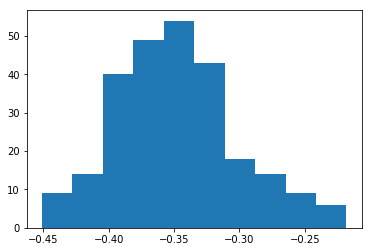

In [676]:
plt.hist(pm_b[0, :]);

Checking that mag errs are 2.5*(df/flog10(e))

In [ ]:
def flux_to_mag(flux):
    return 

Fit a function to the top of the cluster of points.

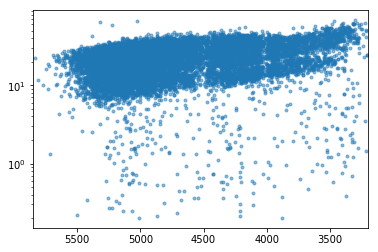

In [25]:
df = pd.read_csv("gaia_mc.csv")
plt.plot(df.Teff, df.Prot, ".", alpha=.5)
plt.xlim(5850, 3200)
plt.yscale("log")

In [26]:
def select_stars(df, bins, column_name):
    """
    Select groups of stars, based on bins.
    
    Args:
        df (pandas.DataFrame): a pandas dataframe.
        bins (array): The list or array of bin edges.
        column_name (str): The name of the column to cut on.
        
    Returns:
        ms (list): a list of masks to select stars with.
    
    """
    
    ms = []
    for i in range(len(bins)-1):
        m = (df["{}".format(column_name)] > bins[i]) * (df["{}".format(column_name)] < bins[i+1])
        ms.append(m)
        
    return ms

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


(6200, 3000)

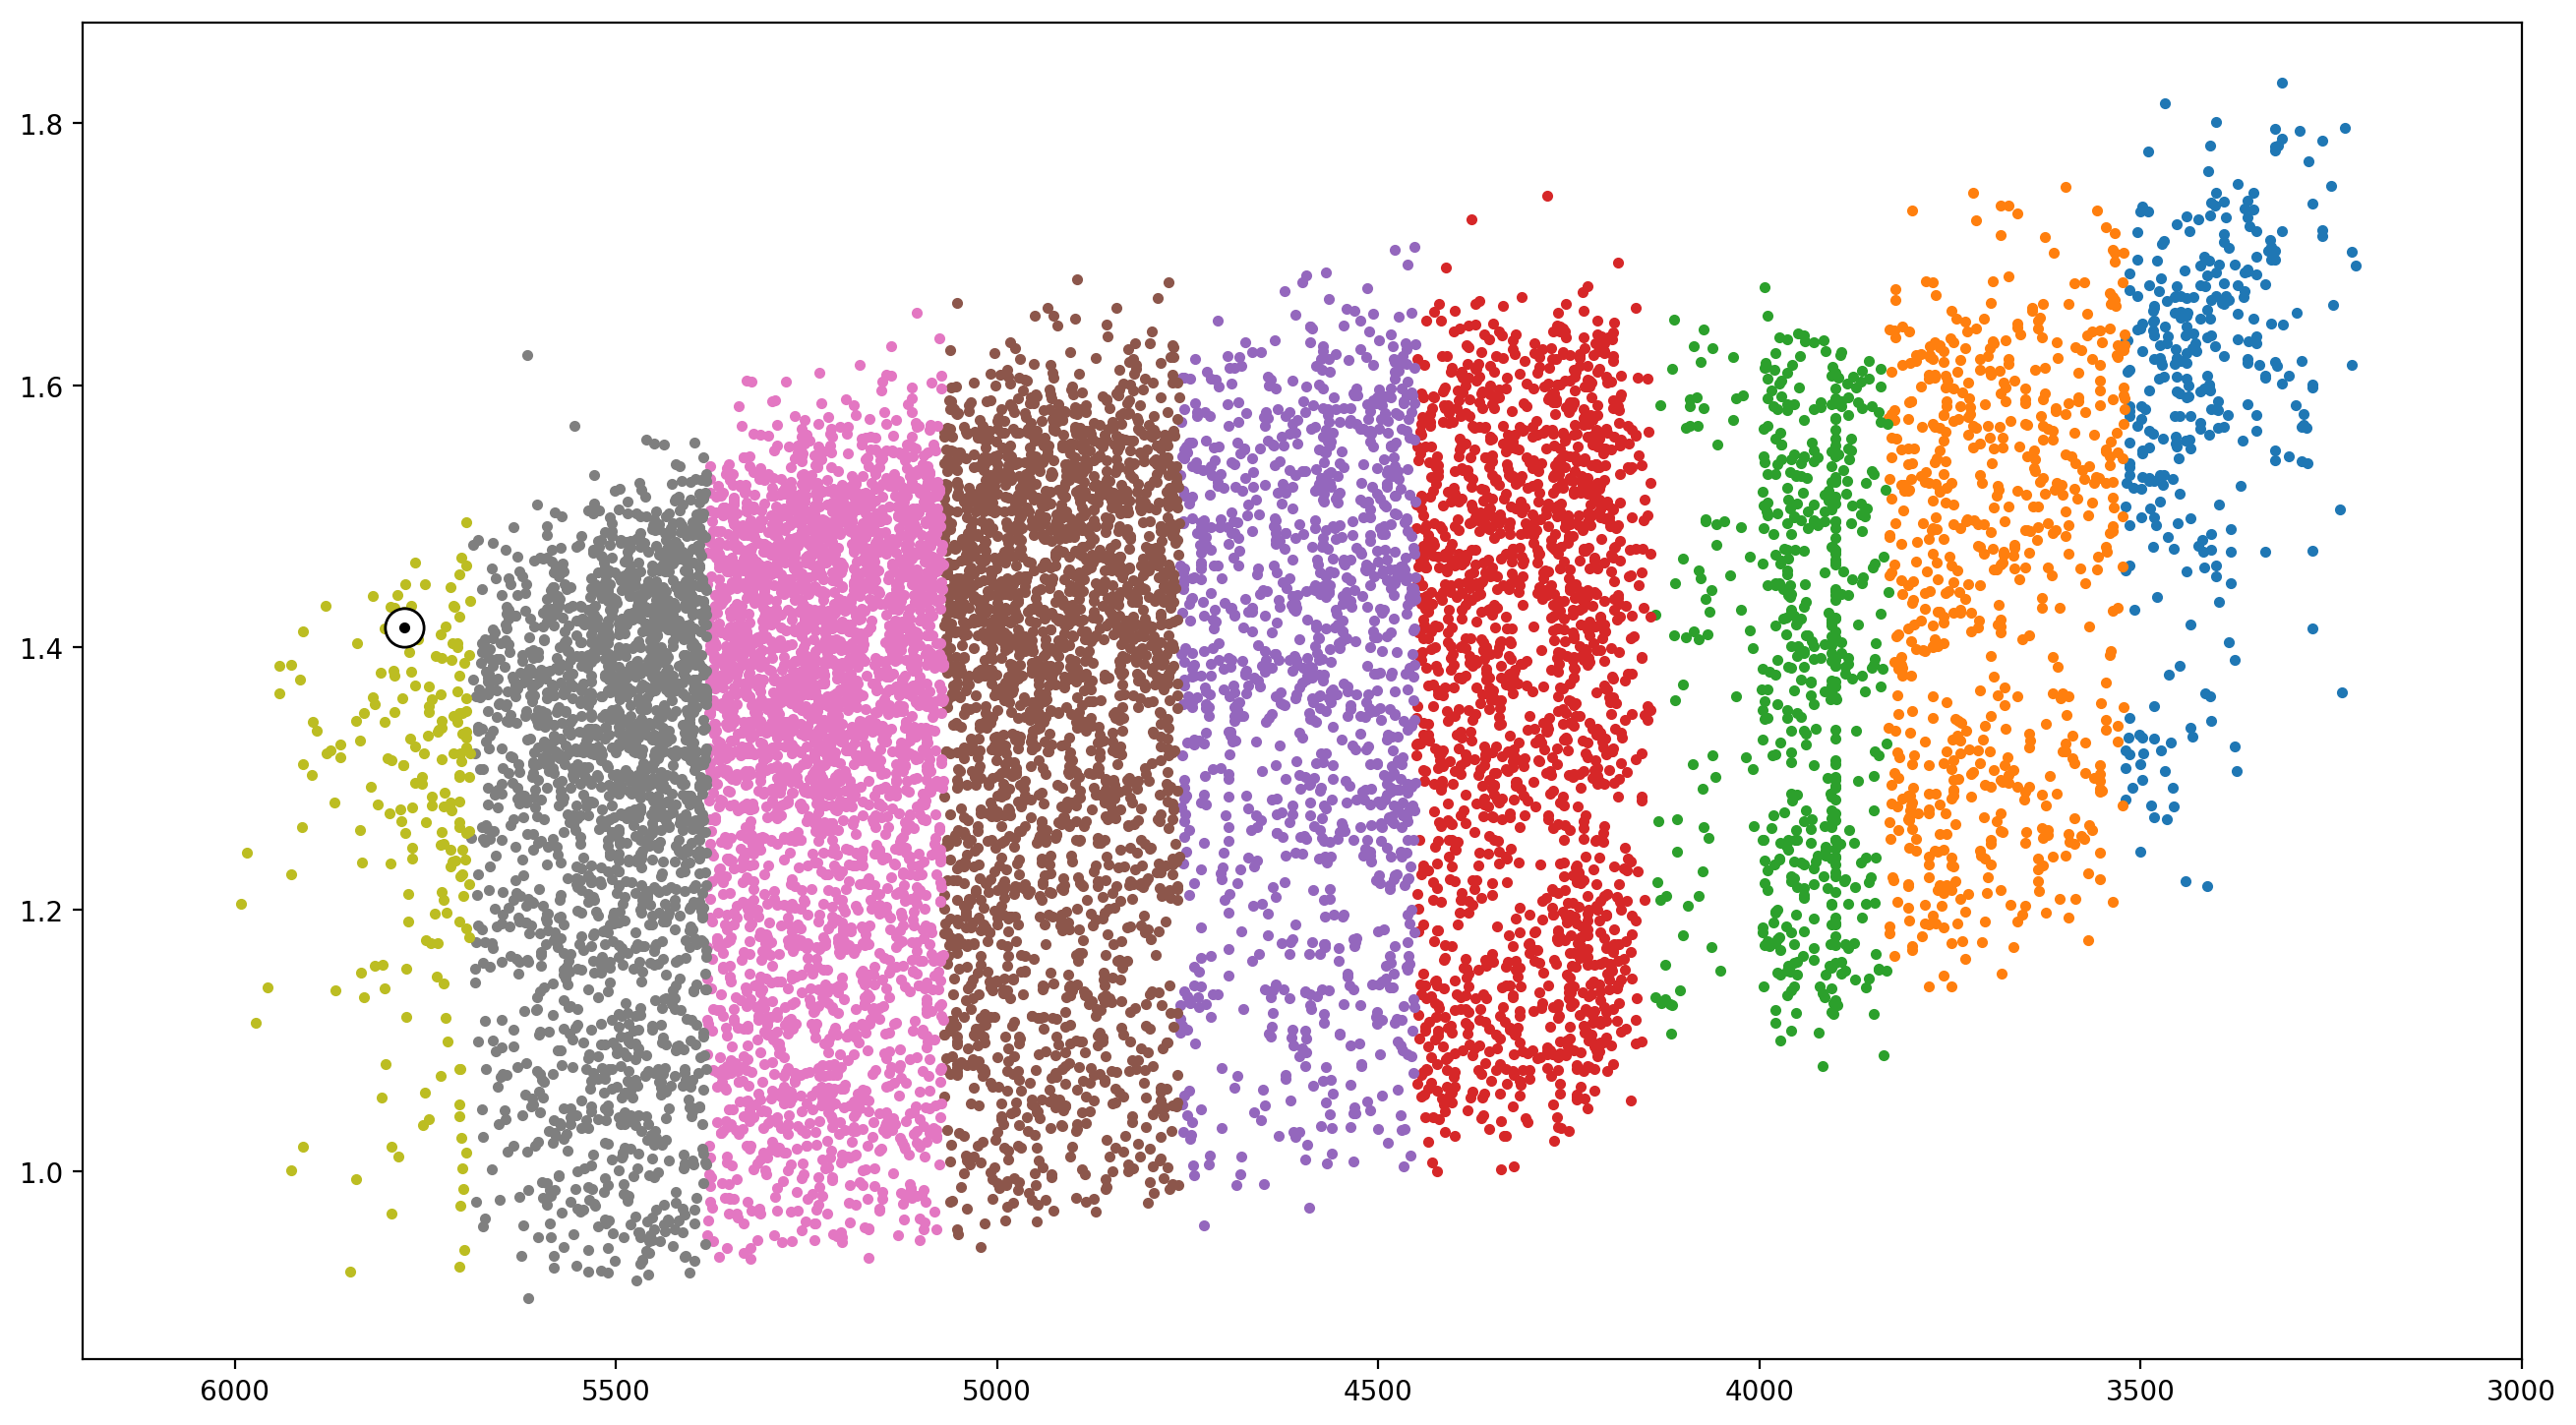

In [111]:
df1 = df.iloc[(df.age.values > .5) * (df.age.values < 7)]# * (df.Prot.values > 25)]

teff_bins = np.linspace(min(df1.teff), 6000, 10)
ms = select_stars(df1, teff_bins, "teff")

plt.figure(figsize=(16, 9), dpi=200)
for m in ms:
    plt.plot(df1.teff.values[m], np.log10(df1.Prot.values[m]), ".")

# Sun
plt.scatter(5778, np.log10(26), facecolors='w', edgecolors="k", s=200, zorder=3, rasterized=True)
plt.plot(5778, np.log10(26), "k.", zorder=3, rasterized=True)
    
plt.xlim(6200, 3000)
# plt.xlabel("$\mathrm{T_{eff}~[K]}$")
# plt.ylabel("$\mathrm{Rotation~period~[days]}$")
# plt.yscale("log")

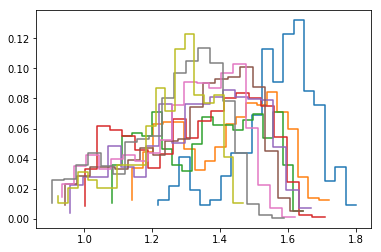

In [112]:
hists, bins, ns = [], [], []
for m in ms:
    ns.append(sum(m))
    hist, b = np.histogram(np.log10(df1.Prot.values[m]), 20, density=False)
    hists.append(hist/sum(m))
    bins.append(b)
    if sum(m)> 100:
        plt.step(b[:-1], hist/sum(m))

(array([4.04594689, 5.39459585, 4.04594689, 4.72027137, 4.04594689,
       3.37162241, 3.37162241, 6.74324482, 3.37162241, 4.72027137,
       6.06892034, 2.69729793, 2.02297345, 4.72027137, 3.37162241,
       4.04594689, 2.02297345, 2.69729793, 0.67432448, 0.67432448]), array([1.40005421, 1.41378537, 1.42751654, 1.4412477 , 1.45497886,
       1.46871003, 1.48244119, 1.49617235, 1.50990351, 1.52363468,
       1.53736584, 1.551097  , 1.56482817, 1.57855933, 1.59229049,
       1.60602165, 1.61975282, 1.63348398, 1.64721514, 1.66094631,
       1.67467747]))


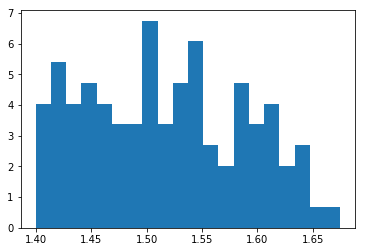

In [95]:
plt.hist(np.log10(df1.Prot.values[ms[10]]), 20, density=True)
print(np.histogram(np.log10(df1.Prot.values[ms[10]]), 20, density=True))

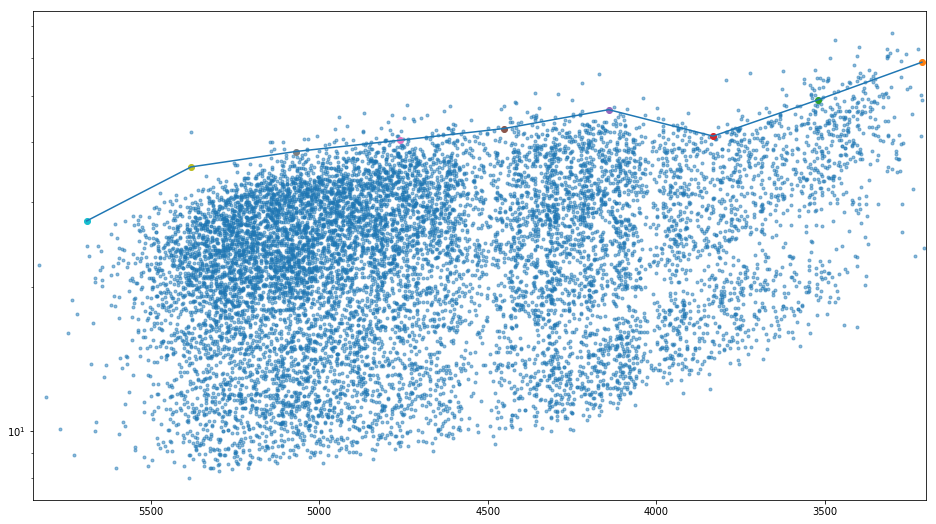

In [113]:
plt.figure(figsize=(16, 9))

log_ps = []

plt.plot(df1.Teff, df1.Prot, ".", alpha=.5)
for i, b in enumerate(bins):
    plt.plot(teff_bins[i], 10**b[-3], "o")
    log_ps.append(b[-3])
#     b = _[:-1]
#     log_ps.append(np.array(b[hists[i] > .0001][-1]))
plt.xlim(5850, 3200)
plt.yscale("log")
plt.plot(teff_bins[:-1], 10**np.array(log_ps))

# p = np.polyfit(teff_bins, log_ps, 3)
# xs = np.linspace()
# plt.plot()

Figure out where the Rossby weakened braking point is.

In [ ]:
large_df = pd.read_csv("../stardate/paper/code/data/large_df.csv")

In [184]:
m = (large_df.eep.values < 454) * (large_df.age.values < np.log10(13.8*1e9))
df = large_df.iloc[m][::10]

(7, 75)

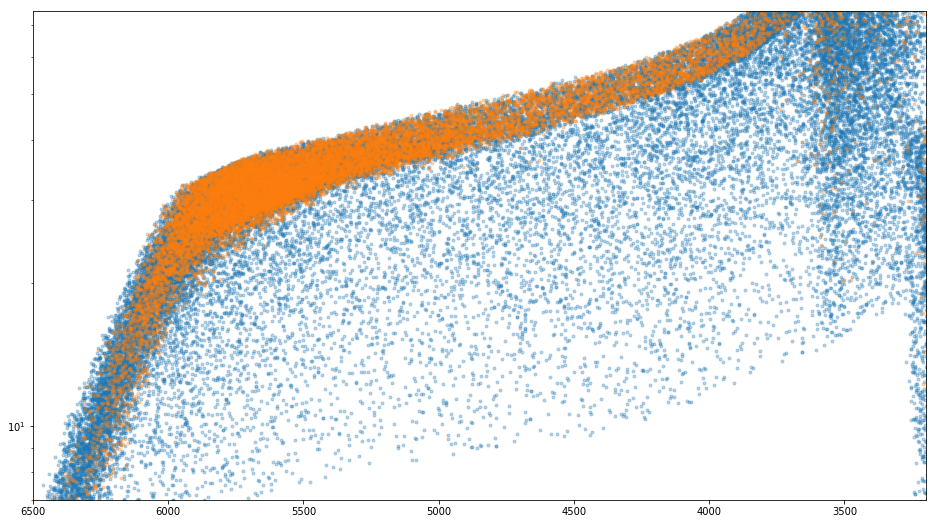

In [185]:
plt.figure(figsize=(16, 9))
m = df.Ro < 2
plt.plot(df.teff[m], df.prot_clean_prasepe[m], ".", alpha=.3)
plt.plot(df.teff[~m], df.prot_clean_prasepe[~m], ".", alpha=.3)
plt.yscale("log")
plt.xlim(6500, 3200)
plt.ylim(7, 75)
# plt.colorbar()

In [186]:
def percentage(df, teff_lims):
    teff_cut = (df.teff.values < teff_lims[0]) * (df.teff.values > teff_lims[1])
    mro = df.Ro.values[teff_cut] < 2
    return float(len(df.teff[teff_cut][~mro]))/float(len(df.teff[teff_cut])) * 100

print(percentage(df, (5500, 5000)))
print(percentage(df, (5000, 4500)))
print(percentage(df, (4500, 4000)))
print(percentage(df, (5000, 3800)))

39.95369806262946
30.40960754878833
23.408954025296126
24.568469505178367


We find that only around 1.5% of stars between 5000 and 3800 K have reached critical Rossby number by 6 Gyr and around 25% of them have by 13.8 Gyrs.